# Importación de librerías para ensayar con diferentes modelos de Regresión

In [1]:
import joblib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor as RFR, GradientBoostingRegressor as GBR, AdaBoostRegressor as ABR, BaggingRegressor as BR
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import BayesianRidge, ElasticNet
from sklearn.kernel_ridge import KernelRidge
from catboost import CatBoostRegressor as CBR

In [3]:
from sklearn.model_selection import GridSearchCV  
import xgboost as xgb
from xgboost import XGBRegressor
from scipy.optimize import minimize
from scipy.optimize import differential_evolution
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from hyperopt import fmin, hp, tpe, Trials, space_eval, STATUS_OK
from lightgbm import LGBMRegressor as LGBMR
from sklearn.svm import SVR
from concurrent.futures import ProcessPoolExecutor
from concurrent.futures import ThreadPoolExecutor

In [4]:
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import precision_score as prec
from sklearn.metrics import recall_score as rec
from sklearn.metrics import f1_score as f1
from sklearn.metrics import confusion_matrix as cm

In [5]:
fl = pd.read_csv("../data/ML/clean_data_for_ML.csv")

In [6]:
fl = fl[fl.duration.notna()]

In [7]:
fl.columns

Index(['arr_mins_of_delay', 'week_day', 'week_num', 'day_time',
       'cod_flight_IATA', 'cod_airliner_IATA', 'cod_airport_IATA', 'duration',
       'Temperature', 'Wind', 'acc_Gusts', 'Relative_hum', 'Pressure',
       'Condition', 'acc_bad_weather'],
      dtype='object')

In [8]:
fl = fl.drop(columns = ['cod_flight_IATA','cod_airport_IATA','Relative_hum','Pressure'])

In [9]:
fl = fl[fl.arr_mins_of_delay > 0]

In [ ]:
(fl[fl.arr_mins_of_delay >= 15].shape[0] / fl.shape[0])*100

In [10]:
# Condiciones para las categorías
conditions = [
    (fl['arr_mins_of_delay'] < 15),
    (fl['arr_mins_of_delay'] >= 15)]

# Valores correspondientes a las categorías
values = ['type1', 'type2']

# Crear la nueva columna 'delay' basada en las condiciones
fl['delay'] = np.select(conditions, values)

In [11]:
fl.delay.value_counts()

type1    155178
type2    133132
Name: delay, dtype: int64

C:\Users\daarr\AppData\Local\Temp\ipykernel_28096\1970479324.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask=np.triu(np.ones_like(fl.corr(), dtype=bool))    # mascara para tapar lo de arriba
C:\Users\daarr\AppData\Local\Temp\ipykernel_28096\1970479324.py:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fl.corr(),


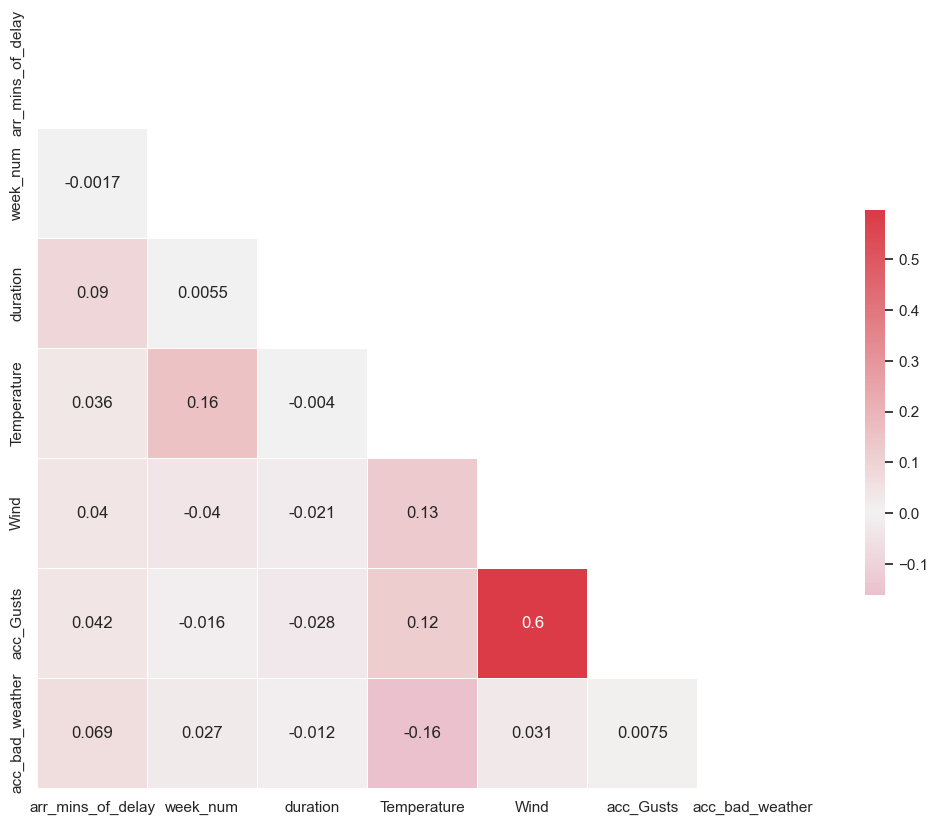

In [12]:
plt.figure(figsize=(15, 10))   # 150x100 pixeles

sns.set(style='white')    # estilo blanco

mask=np.triu(np.ones_like(fl.corr(), dtype=bool))    # mascara para tapar lo de arriba

cmap=sns.diverging_palette(0, 10, as_cmap=True)   # paleta de  colores


sns.heatmap(fl.corr(),    
           mask=mask,
          cmap=cmap,
          center=0,
          square=True,
          annot=True,
          linewidths=0.5,
          cbar_kws={'shrink': 0.5});

In [13]:
fl['week_num'] = fl['week_num'].astype('object')

In [14]:
fl=pd.get_dummies(fl, columns = ['Condition','day_time',
                       'week_day','week_num','cod_airliner_IATA'], drop_first=True)


C:\Users\daarr\AppData\Local\Temp\ipykernel_28096\1753315288.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  fl=pd.get_dummies(fl, columns = ['Condition','day_time',


In [15]:
X = fl.drop(['arr_mins_of_delay'], axis=1)

y = fl.arr_mins_of_delay

In [16]:
X_train, X_test, y_train, y_test = tts(X, y, 
                                       train_size=0.8, 
                                       test_size=0.2
                                      ,random_state=42)


X_train.shape, X_test.shape, y_train.shape, y_test.shape

((230648, 184), (57662, 184), (230648,), (57662,))

In [17]:
X_tscore = X_test["delay"]

In [18]:
X_train = X_train.drop('delay', axis=1)

In [19]:
X_test = X_test.drop('delay', axis=1)

In [20]:
escalador = StandardScaler()    # inicia el normalizador
 
X_train[['duration', 'Wind', 'acc_Gusts','acc_bad_weather','Temperature',]] = escalador.fit_transform(X_train[['duration', 'Wind', 'acc_Gusts','acc_bad_weather','Temperature',]])   # transforma train
X_test[['duration', 'Wind', 'acc_Gusts','acc_bad_weather','Temperature',]] = escalador.transform(X_test[['duration', 'Wind', 'acc_Gusts','acc_bad_weather','Temperature',]])  # transforma test

In [21]:
X_train.head()

,duration,Temperature,Wind,acc_Gusts,acc_bad_weather,Condition_Chance of Showers,Condition_Clear,Condition_Cloudy,Condition_Drizzle,Condition_Fair,...,cod_airliner_IATA_TS,cod_airliner_IATA_TU,cod_airliner_IATA_U2,cod_airliner_IATA_UA,cod_airliner_IATA_UX,cod_airliner_IATA_V7,cod_airliner_IATA_VY,cod_airliner_IATA_W6,cod_airliner_IATA_WT,cod_airliner_IATA_YW
522089,2.000390,1.026474,-0.223981,-0.460978,-0.294298,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
33452,-0.331698,-1.498397,-0.003655,-0.460978,2.662965,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
111427,-0.331698,0.016526,-0.444308,0.157250,-0.294298,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
663547,-0.331698,2.036423,1.318305,2.668801,-0.294298,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
675025,0.334613,1.127469,1.318305,2.861997,-0.294298,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Entreno el modelo

In [22]:
model = RFR(n_jobs = 8) 

In [23]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=8)

In [24]:
joblib.dump(model, 'modelo_regresion1.joblib')

['modelo_regresion1.joblib']

# Obtengo el mse 

In [25]:
y_pred_RFR = model.predict(X_test)
print(mean_squared_error(y_test, y_pred_RFR, squared=False))

35.12838638897513


# Genero un dataframe para comprobar la clasificación en función de la regresión


In [82]:
# Crear un DataFrame
fl_score = pd.DataFrame({
    'Tipo_test': X_tscore,
    
    'Valor_test': y_test,
    
    'Prediccion': y_pred_RFR
})

In [83]:
fl_score.shape

(57662, 3)

In [84]:
# Condiciones para las categorías
conditions = [
    (fl_score['Prediccion'] <= 30),
    (fl_score['Prediccion'] >= 30)]
conditions2 = [
    (fl_score['Valor_test'] <= 30),
    (fl_score['Valor_test'] >30) 
]

# Valores correspondientes a las categorías
values = ['type1', 'type2']

# Crear la nueva columna 'delay' basada en las condiciones
fl_score['Tipo_prediccion'] = np.select(conditions, values)
fl_score['Tipo_test'] = np.select(conditions2, values)
fl_score['acierto'] = (fl_score['Tipo_test'] == fl_score['Tipo_prediccion'])

fl_score.head()

,Tipo_test,Valor_test,Prediccion,Tipo_prediccion,acierto
740258,type1,5,10.124167,type1,True
240895,type1,1,10.903333,type1,True
404454,type1,26,21.328198,type1,True
61195,type1,9,28.026667,type1,True
218115,type1,12,40.077528,type2,False


In [85]:
fl_score.Tipo_test.value_counts()

type1    43948
type2    13714
Name: Tipo_test, dtype: int64

In [86]:
fl_score.Tipo_prediccion.value_counts()

type1    42546
type2    15116
Name: Tipo_prediccion, dtype: int64

In [87]:
fl_score.groupby('Tipo_test').agg({'acierto':'sum'})

,acierto
Tipo_test,
type1,34497
type2,5665


# Tasa de acierto en cada una de las categosrías

In [88]:
print(fl_score.groupby('Tipo_test').agg({'acierto':'sum'}).loc['type1']/len(fl_score[fl_score.Tipo_test == "type1"])*100)
print(fl_score.groupby('Tipo_test').agg({'acierto':'sum'}).loc['type2']/len(fl_score[fl_score.Tipo_test == "type2"])*100)

acierto    78.49504
Name: type1, dtype: float64
acierto    41.308152
Name: type2, dtype: float64


# Distribución de las predicciones junto con la distribución de los valores reales del test

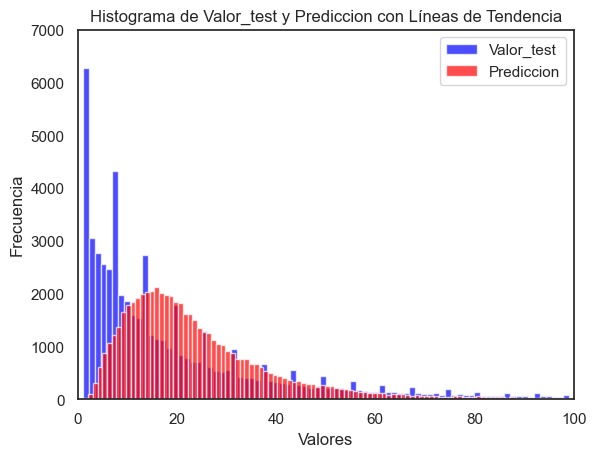

In [89]:
# Suponiendo que 'fl_score' es tu DataFrame
valor_test_columna = fl_score['Valor_test']
prediccion_columna = fl_score['Prediccion']


# Crear un histograma para 'Valor_test'
plt.hist(valor_test_columna, bins=300, color='blue', alpha=0.7, label='Valor_test')

# Crear un histograma para 'Prediccion' y superponerlo en rojo
plt.hist(prediccion_columna, bins=300, color='red', alpha=0.7, label='Prediccion')

# Limitar el eje x hasta 100
plt.xlim(0, 100)
plt.ylim(0, 7000)
# Agregar leyenda
plt.legend()

# Agregar título y etiquetas
plt.title('Histograma de Valor_test y Prediccion con Líneas de Tendencia')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show();

# Desviación media de las predicciones para valores negativos y positivos

In [90]:
fl_score['Prediccion'].mean()

25.08082080411303

In [91]:
fl_score['diff'] = fl_score.Valor_test - fl_score.Prediccion
# print(fl_score['diff'][fl_score.Valor_test <= 0].mean())
print(fl_score['diff'][fl_score.Valor_test > 0].mean())

-0.5771788908946185


# Ajuste manual de la predicción con el objetivo de mejorar la clasificación +/- 15 minutos

In [100]:
fl_score['pred_mod'] =   fl_score.Prediccion +10
# fl_score['pred_mod'][ fl_score.Prediccion <= -5] = fl_score.Prediccion - 10
# # # fl_score['pred_mod'][fl_score.Valor_test <= 0] = fl_score.Prediccion 
# fl_score['pred_mod'][fl_score.Prediccion > -5] = fl_score.Prediccion + 10

In [101]:
conditions3 = [
    (fl_score['pred_mod'] <= 30),
    (fl_score['pred_mod'] > 30) 
]
# Valores correspondientes a las categorías
values = ['type1', 'type2']
fl_score['Tipo_pred_mod'] = np.select(conditions3, values)
fl_score['acierto2'] = (fl_score['Tipo_test'] == fl_score['Tipo_pred_mod'])
fl_score.head()

,Tipo_test,Valor_test,Prediccion,Tipo_prediccion,acierto,diff,pred_mod,Tipo_pred_mod,acierto2,y_test,y_pred
740258,type1,5,10.124167,type1,True,-5.124167,20.124167,type1,True,0,0
240895,type1,1,10.903333,type1,True,-9.903333,20.903333,type1,True,0,0
404454,type1,26,21.328198,type1,True,4.671802,31.328198,type2,False,0,0
61195,type1,9,28.026667,type1,True,-19.026667,38.026667,type2,False,0,1
218115,type1,12,40.077528,type2,False,-28.077528,50.077528,type2,False,0,1


# Obtengo el mse del modelo ajustado

In [102]:
print(mean_squared_error(fl_score['Valor_test'], fl_score['pred_mod'], squared=False))

36.68169990759732


# Número de aciertos por categoría

In [103]:
fl_score.groupby('Tipo_test').agg({'acierto2':'sum'})

,acierto2
Tipo_test,
type1,23769
type2,9168


# Número de prediciones por categoría

In [104]:
fl_score.Tipo_pred_mod.value_counts()

type2    29347
type1    28315
Name: Tipo_pred_mod, dtype: int64

In [105]:
fl_score['y_test'] = fl_score['Tipo_test'].map({'type1': 0, 'type2': 1})
fl_score['y_pred'] = fl_score['Tipo_pred_mod'].map({'type1': 0, 'type2': 1})
fl_score.head()

,Tipo_test,Valor_test,Prediccion,Tipo_prediccion,acierto,diff,pred_mod,Tipo_pred_mod,acierto2,y_test,y_pred
740258,type1,5,10.124167,type1,True,-5.124167,20.124167,type1,True,0,0
240895,type1,1,10.903333,type1,True,-9.903333,20.903333,type1,True,0,0
404454,type1,26,21.328198,type1,True,4.671802,31.328198,type2,False,0,1
61195,type1,9,28.026667,type1,True,-19.026667,38.026667,type2,False,0,1
218115,type1,12,40.077528,type2,False,-28.077528,50.077528,type2,False,0,1


# Distribución de las predicciones ajustadas junto con la distribución de los valores reales del test

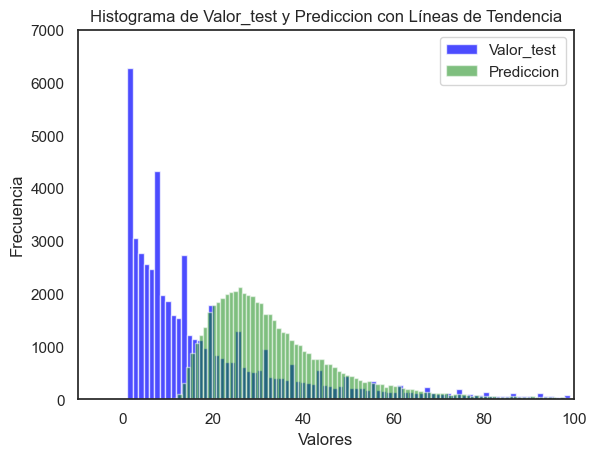

In [106]:
# Suponiendo que 'fl_score' es tu DataFrame
valor_test_columna = fl_score['Valor_test']
prediccion_corregida = fl_score['pred_mod']

# Crear un histograma para 'Valor_test'
plt.hist(valor_test_columna, bins=300, color='blue', alpha=0.7, label='Valor_test')

# Crear un histograma para 'Prediccion' y superponerlo en rojo
plt.hist(prediccion_corregida, bins=300, color='green', alpha=0.5, label='Prediccion')

# Limitar el eje x hasta 100
plt.xlim(-10, 100)
plt.ylim(0, 7000)
# Agregar leyenda
plt.legend()

# Agregar título y etiquetas
plt.title('Histograma de Valor_test y Prediccion con Líneas de Tendencia')
plt.xlabel('Valores')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show();

# Porcentaje de acierto por categoría

In [107]:
print(fl_score.groupby('Tipo_test').agg({'acierto2':'sum'}).loc['type1']/len(fl_score[fl_score.Tipo_test == "type1"])*100)
print(fl_score.groupby('Tipo_test').agg({'acierto2':'sum'}).loc['type2']/len(fl_score[fl_score.Tipo_test == "type2"])*100)
print(fl_score.acierto2.sum()/len(fl_score)*100)

acierto2    54.084372
Name: type1, dtype: float64
acierto2    66.851393
Name: type2, dtype: float64
57.12080746418785


# MÉTRICAS DE LAS PREDICIONES AJUSTADAS

In [108]:
print("Accuracy: ", acc(fl_score['y_test'], fl_score['y_pred']))
print("Precision: ", prec(fl_score['y_test'], fl_score['y_pred']))
print("Recall: ", rec(fl_score['y_test'], fl_score['y_pred']))
print("F1: ", f1(fl_score['y_test'], fl_score['y_pred']))

Accuracy:  0.5712080746418785
Precision:  0.31239990458990696
Recall:  0.6685139273734869
F1:  0.42581454216112025


# MATRIZ DE CONFUSIÓN DEL MODELO AJUSTADO

In [109]:
print("F1: ", cm(fl_score['y_test'], fl_score['y_pred']))

F1:  [[23769 20179]
 [ 4546  9168]]


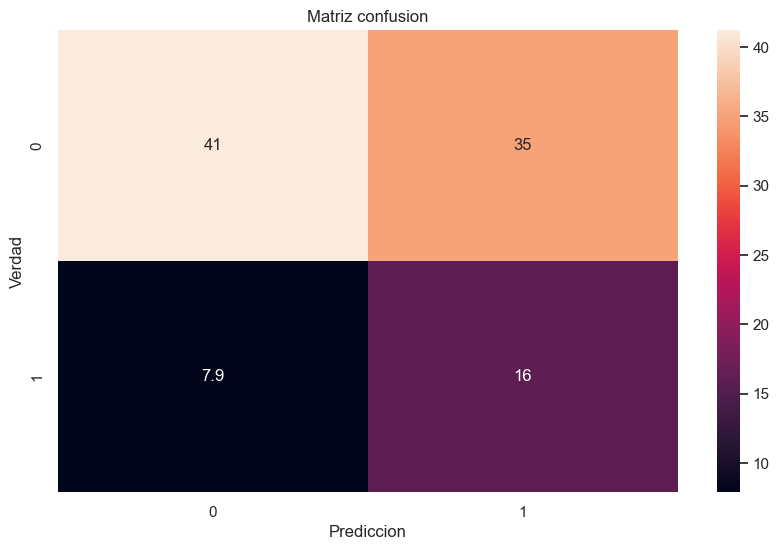

In [110]:
plt.figure(figsize=(10, 6))

ax=sns.heatmap(cm(fl_score['y_test'], fl_score['y_pred'])/cm(fl_score['y_test'], fl_score['y_pred']).sum() * 100, 
               annot=True)

plt.title('Matriz confusion')
plt.ylabel('Verdad')
plt.xlabel('Prediccion')
plt.show();

# Entreno el modelo y el escalador con todos los datos

In [111]:
fl2 = pd.read_csv("../data/ML/clean_data_for_ML.csv")

In [112]:
fl2 = fl2[fl2.duration.notna()]
fl2 = fl2.drop(columns = ['cod_flight_IATA','Relative_hum','Pressure','cod_airport_IATA'])
fl2 = fl2[fl2.arr_mins_of_delay > 0]
fl2['week_num'] = fl2['week_num'].astype('object')
fl2=pd.get_dummies(fl2, columns = ['Condition','day_time',
                       'week_day','week_num','cod_airliner_IATA'], drop_first=True)


C:\Users\daarr\AppData\Local\Temp\ipykernel_28096\1528670774.py:5: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  fl2=pd.get_dummies(fl2, columns = ['Condition','day_time',


In [113]:
X2 = fl2.drop('arr_mins_of_delay', axis=1)
y2 = fl2.arr_mins_of_delay

In [114]:
escalador_reg = StandardScaler()    # inicia el normalizador
X2[['duration','Temperature', 'Wind', 'acc_Gusts','acc_bad_weather']] = escalador_reg.fit_transform(X2[['duration','Temperature', 'Wind', 'acc_Gusts','acc_bad_weather']])   # transforma train

In [115]:
rfr_def = RFR(n_jobs = 8) 

In [116]:
rfr_def.fit(X2, y2)

RandomForestRegressor(n_jobs=8)

In [117]:
joblib.dump(rfr_def, 'modelo_regresion.joblib')

['modelo_regresion.joblib']

In [118]:
joblib.dump(escalador_reg, 'escalador_regresion.joblib')

['escalador_regresion.joblib']

In [120]:
list(X2.columns)

['duration',
 'Temperature',
 'Wind',
 'acc_Gusts',
 'acc_bad_weather',
 'Condition_Chance of Showers',
 'Condition_Clear',
 'Condition_Cloudy',
 'Condition_Drizzle',
 'Condition_Fair',
 'Condition_Fog',
 'Condition_Fog Patches',
 'Condition_Freezing',
 'Condition_Hail',
 'Condition_Light Rain',
 'Condition_Light Snow',
 'Condition_Mist',
 'Condition_Mostly Cloudy',
 'Condition_Partly Cloudy',
 'Condition_Rain',
 'Condition_Rain and Snow',
 'Condition_Snow',
 'Condition_T-Storm',
 'Condition_Widespread Fog',
 'day_time_Early Morning',
 'day_time_Morning',
 'day_time_Night',
 'week_day_Monday',
 'week_day_Saturday',
 'week_day_Sunday',
 'week_day_Thursday',
 'week_day_Tuesday',
 'week_day_Wednesday',
 'week_num_1',
 'week_num_2',
 'week_num_3',
 'week_num_4',
 'week_num_5',
 'week_num_6',
 'week_num_7',
 'week_num_8',
 'week_num_9',
 'week_num_10',
 'week_num_11',
 'week_num_12',
 'week_num_13',
 'week_num_14',
 'week_num_15',
 'week_num_16',
 'week_num_17',
 'week_num_18',
 'week_num_1

# Prueba de diferentes modelos

In [ ]:
# models = {
#     "linear_regression": LinearRegression(),
#     "ridge_regression": Ridge(),
#     "lasso_regression": Lasso(),
#     "decision_tree_regressor": DecisionTreeRegressor(),
#     "random_forest_regressor": RFR(n_jobs = 8),
#     "gradient_boosting_regressor": GBR(),
#     "mlp_regressor": MLPRegressor(),
#     "elastic_net": ElasticNet(),
#     "ada_boost_regressor": ABR(),
#     "bagging_regressor": BR(),
#     "CatBoostRegressor": CBR(),
#     "XGBRegressor" : XGBRegressor(),
#     "LGBMRegressor": LGBMR()
# }

In [ ]:
# def fit_and_score(models, X_train, X_test, y_train, y_test):
#     """
#     Fits the given machine learning models to the training data and evaluates their performance on the test data.
#     Parameters:
#     - models (dict): A dictionary where keys are model names and values are the corresponding machine learning models.
#     - X_train (array-like): Feature matrix of the training set.
#     - X_test (array-like): Feature matrix of the test set.
#     - y_train (array-like): True labels of the training set.
#     - y_test (array-like): True labels of the test set.
#     Returns:
#     dict: A dictionary where keys are model names and values are their corresponding accuracy scores on the test set.
#     This function takes a dictionary of machine learning models and fits each model to the training data.
#     It then evaluates the performance of each model on the provided test data using the `score` method,
#     and returns a dictionary of model names and their corresponding accuracy scores.
#     """
#     model_scores = {}
#     for name, model in models.items():
#         model.fit(X_train, y_train)
#         y_pred = model.predict(X_test)
#         model_scores[name] = round(mse(y_test, y_pred, squared=False), 5)
#     return model_scores

In [ ]:
# fit_and_score(models, X_train, X_test, y_train, y_test)